In [1]:
import sys
# Add the parent directory to the system path
sys.path.insert(1, r"C:\Users\sk88\Documents\Python")

import Function_files.data_functions as dat
from Function_files.plotting_functions import plot_TPA
from TPA import plot_config as config_file

import matplotlib.pyplot as mp  
import os

In [2]:
# import config file dictionary
config = config_file.config_params
dir = os.path.join(config['root'], config['file'])
# interogate directory to extract folder and file names
folder_list, file_list = dat.dir_interogate(path=dir, extensions=config['extensions'], exceptions=config['exceptions'])
# create dictionary for indexing folders and files
fol_i = dat.make_index_dict(folder_list)
fil_i = [dat.make_index_dict(file_sub_list) for file_sub_list in file_list]
# make paths and extract data
data_path_list = dat.search_paths(folder_list, file_list, config['extensions'])
json_sets = [dat.read_json(os.path.join(dir, x)) for data_list in data_path_list for x in data_list]
# find the keys
json_keys = [key for key in json_sets[0]]
json_subkeys = [key for key in json_sets[0]['area']]
# 
data_values = [[json_set[key] for json_set in json_sets] for key in json_keys]

In [3]:
labels = ['HP_m5GHz', 'HP_m3GHz', 'HP_Res', 'LP_m5GHz', 'LP_m3GHz', 'LP_Res']

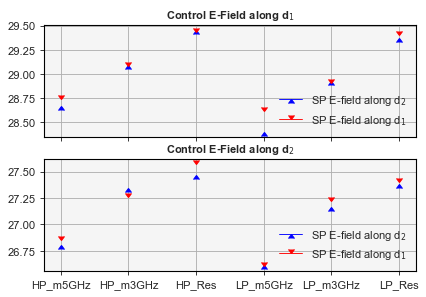

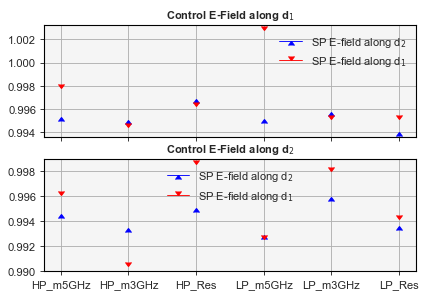

In [4]:
fig, ax = plot_TPA(data_values, json_subkeys, config['c_axis'], labels)

for title, figure in zip(json_keys, fig):
    name = os.path.join(dir, 'TPA_' + title + '.png')
    #figure.savefig(fname=name, dpi=120, format='png', bbox_inches='tight')


Text(0.02, 0.5, 'Transmission of 995nm Pulses')

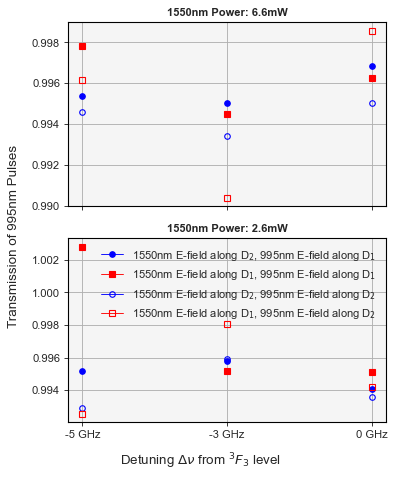

In [7]:
import matplotlib.pyplot as mp

labels = ['-5 GHz', '-3 GHz', '0 GHz']
fig, ax = mp.subplots(nrows=2, sharex=True, figsize=(5,6))

ax[0].plot(labels[0], data_values[1][0]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[0], data_values[1][0]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[0], data_values[1][0]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[0], data_values[1][0]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[1], data_values[1][1]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[1], data_values[1][1]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[1], data_values[1][1]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[1], data_values[1][1]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[2], data_values[1][2]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[2], data_values[1][2]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[2], data_values[1][2]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[2], data_values[1][2]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[0], data_values[1][3]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[0], data_values[1][3]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[0], data_values[1][3]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[0], data_values[1][3]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[1], data_values[1][4]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[1], data_values[1][4]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[1], data_values[1][4]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[1], data_values[1][4]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[2], data_values[1][5]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[2], data_values[1][5]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[2], data_values[1][5]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[2], data_values[1][5]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].legend([f"1550nm E-field along D$_{config['c_axis']['sph']}$, 995nm E-field along D$_{config['c_axis']['cph']}$", f"1550nm E-field along D$_{config['c_axis']['spl']}$, 995nm E-field along D$_{config['c_axis']['cph']}$", 
              f"1550nm E-field along D$_{config['c_axis']['sph']}$, 995nm E-field along D$_{config['c_axis']['cpl']}$", f"1550nm E-field along D$_{config['c_axis']['spl']}$, 995nm E-field along D$_{config['c_axis']['cpl']}$"])

ax[0].set(title=('1550nm Power: 6.6mW'))
ax[1].set(title=('1550nm Power: 2.6mW'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('Detuning $\Delta\\nu$ from $^{3}F_{3}$ level')
fig.supylabel('Transmission of 995nm Pulses')